In [1]:
import cv2 #for image processing
import numpy as np #to store image
import imageio #to read image stored at particular path
import sys
import matplotlib.pyplot as plt
import os


In [2]:
# read the image
originalmage = cv2.imread("face.jpg")
originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
#print(image)  # image is stored in form of numbers

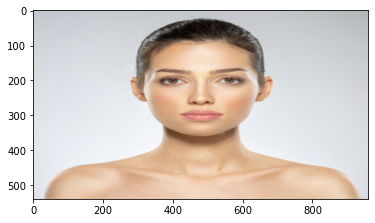

In [3]:
ReSized1 = cv2.resize(originalmage, (960, 540))
plt.imshow(ReSized1, cmap='gray')

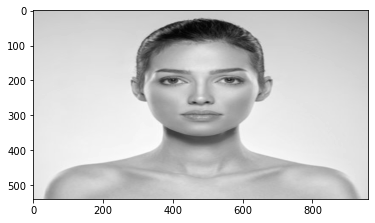

In [4]:
#converting an image to grayscale
grayScaleImage= cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
ReSized2 = cv2.resize(grayScaleImage, (960, 540))
plt.imshow(ReSized2, cmap='gray')

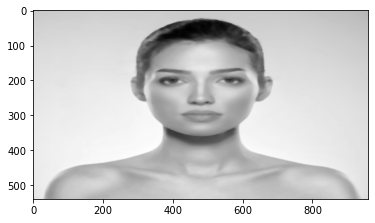

In [5]:
#applying median blur to smoothen an image
smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
plt.imshow(ReSized3, cmap='gray')

In [6]:
#retrieving the edges for cartoon effect
#by using thresholding technique
getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

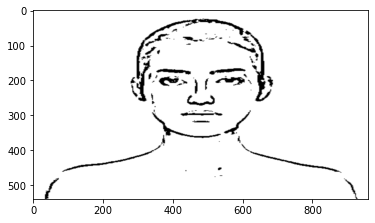

In [7]:
ReSized4 = cv2.resize(getEdge, (960, 540))
plt.imshow(ReSized4, cmap='gray')

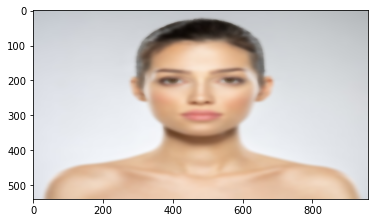

In [8]:
#applying bilateral filter to remove noise 
#and keep edge sharp as required
colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
ReSized5 = cv2.resize(colorImage, (960, 540))
plt.imshow(ReSized5, cmap='gray')

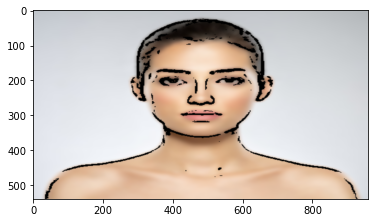

In [9]:
#masking edged image with our "BEAUTIFY" image
cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

ReSized6 = cv2.resize(cartoonImage, (960, 540))
plt.imshow(ReSized6, cmap='gray')

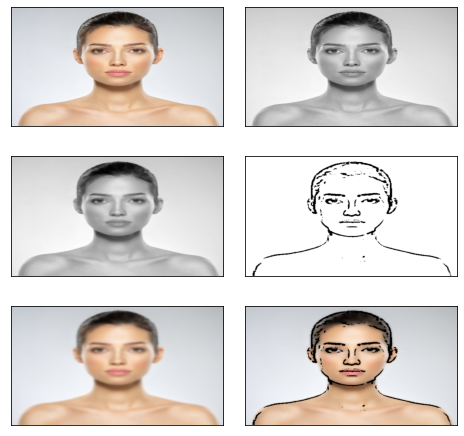

In [10]:
# Plotting the whole transition
images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]

fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')